In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [4]:
stocks=input("Enter the code of the stock:- ")
data=yf.download(stocks, "2008-01-01", "2022-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [5]:
data.shape

(3536, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3536 entries, 2007-12-31 to 2022-01-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3536 non-null   float64
 1   High    3536 non-null   float64
 2   Low     3536 non-null   float64
 3   Close   3536 non-null   float64
 4   Volume  3536 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.8 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,3.719928,3.795877,3.640094,3.713908,131415.863688
std,1.785544,1.821776,1.744375,1.780622,54418.303721
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.704750,2.751000,2.653750,2.702000,92202.250000
50%,3.275000,3.337000,3.213500,3.267000,126607.500000
75%,4.168000,4.257500,4.081500,4.164500,161709.750000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


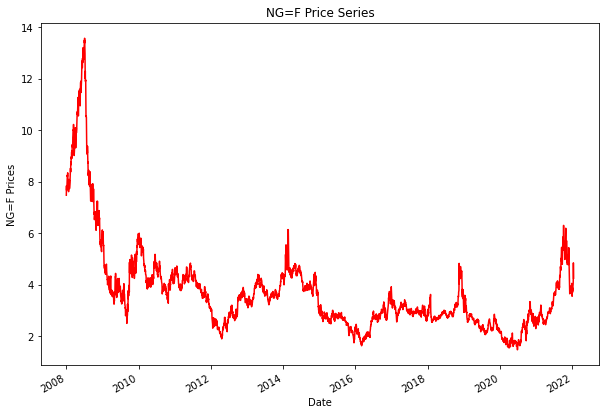

In [8]:
data.Close.plot(figsize=(10,7),color="r")
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

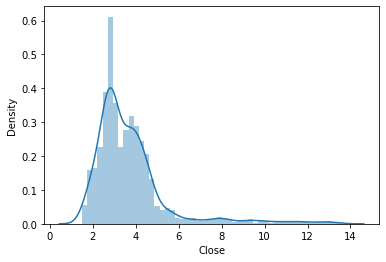

In [9]:
sns.distplot(data["Close"])

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

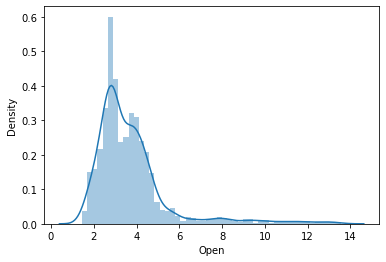

In [10]:
sns.distplot(data["Open"])

C:\Users\tanma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

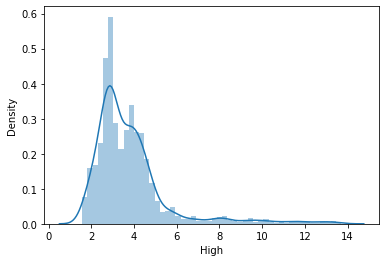

In [11]:
sns.distplot(data["High"])

In [12]:
X=data.drop("Close", axis=1)
Y=data["Close"]
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2828, 4)
(708, 4)
(2828,)
(708,)


In [13]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
pred1 = lr.predict(X_test)

In [15]:
res1 = pd.DataFrame({
        "1. Actual" : Y_test,
        '2. Predicted' : pred1
    })
res1

,1. Actual,2. Predicted
Date,,
2021-09-30,5.867,5.783866
2021-11-24,5.068,5.025692
2015-12-09,2.062,2.084242
2017-05-23,3.219,3.233803
2016-03-16,1.868,1.849951
...,...,...
2019-10-08,2.288,2.295331
2014-04-15,4.567,4.571433
2011-06-09,4.674,4.653796


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
def cal_metrics(Y_test,Y_pred):
    mse= mean_squared_error(Y_test, Y_pred)
    rmse=np.sqrt(mse)
    r2_squared= r2_score(Y_test,Y_pred)
    
    print("MSE= ", mse)
    print("RMSE= ", rmse)
    print("r2_squared= ", r2_squared)
    
cal_metrics(Y_test, pred1)

MSE=  0.0019773882074921884
RMSE=  0.04446783340227167
r2_squared=  0.9992955796350256


In [18]:
from sklearn.linear_model import Lasso, Ridge

la= Lasso().fit(X_train, Y_train)
ri= Ridge().fit(X_train, Y_train)

la_pred= la.predict(X_test)
ri_pred= ri.predict(X_test)

In [20]:
cal_metrics(Y_test, la_pred)

MSE=  0.2829650495544904
RMSE=  0.531944592560626
r2_squared=  0.899197161828445


In [21]:
cal_metrics(Y_test, ri_pred)

MSE=  0.002004780079734073
RMSE=  0.04477477057154032
r2_squared=  0.9992858216155488


In [22]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr=SVR().fit(X_train,Y_train)
svr_pred=svr.predict(X_test)

In [23]:
cal_metrics(Y_test, svr_pred)

MSE=  2.6037023148908824
RMSE=  1.6135991803700453
r2_squared=  0.07246289424055896


In [24]:
param_grid={"C": [0.1,1,10,100,1000],
           "gamma": [1,0.1,0.01,0.001,0.0001],
           "kernel": ["rbf"]}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [25]:
print(grid.best_params_) 
grid_predictions = grid.predict(X_test)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [32]:
svr = SVR(C=10, gamma=0.1, kernel='rbf') 
svr.fit(X_train, Y_train) 
svr_pred = svr.predict(X_test) 

In [33]:
cal_metrics(Y_test, svr_pred)

MSE=  2.794249945053516
RMSE=  1.671601012518692
r2_squared=  0.004582631439557172
